In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [69]:
!pip install geopandas matplotlib contextily

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ---------------------- ----------------- 184.3/323.6 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.2 MB 23.7 MB/s eta 0:00:01
   ----- ---------------------------------- 2.1/16.2 MB 26.8 MB/s eta 0:00:01
   -------- ------------------------------- 3.4/16.2 MB 27.1 MB/s eta 0:00:01
   ----------- ---------------------------- 4.8/16.2 MB 27.8 MB/s eta 0:00:01
   -------------- ------------------------- 5.9/16.2 MB 27.1 MB/s eta 0:00:01
   ----------------- ---------------------- 7.2/16.2 MB 27.0 MB/s eta 0:00:01
   ------------------ --------------------- 7.5/16.2 MB 26.5 MB/s eta 0:00:01
   ------------------- -------------------- 7.8/16.2 MB 21.6 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.2 MB 26.2 MB/s eta 0:00

In [56]:
# Constants
DATA_FOLDER = Path('../DATA_STORE')
ARTIFACTS_STORE = Path('../artifacts')
RAW_DATA_FOLDER = DATA_FOLDER / 'raw_data'
FINAL_DATA_FOLDER = DATA_FOLDER / 'final_data'

In [9]:
csv_file = 'complaints.csv'
# Specify the correct dtypes for the problematic columns
dtypes = {
    'Company public response': 'object',
    'Consumer complaint narrative': 'object',
    'Consumer consent provided?': 'object',
    'Consumer disputed?': 'object',
    'Tags': 'object',
    'ZIP code': 'object'
}

# Read the CSV file with Dask, specifying the dtypes
df = pd.read_csv(csv_file, dtype=dtypes)

In [10]:
data = df.copy()

In [11]:
print(df.shape)
df.head()

(6270697, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-09-13,Debt collection,Rental debt,False statements or representation,Told you not to respond to a lawsuit they file...,NaN,NaN,"National Credit Systems,Inc.",NC,28348,NaN,NaN,Web,2024-09-13,In progress,Yes,NaN,10126195
1,2024-07-20,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I want to report that someone opened a account...,NaN,TRANSWORLD SYSTEMS INC,NY,11590,NaN,Consent provided,Web,2024-07-20,Closed with explanation,Yes,NaN,9568668
2,2024-06-03,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,77057,NaN,Consent not provided,Web,2024-06-03,Closed with explanation,Yes,NaN,9162861
3,2024-06-03,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I have identified unauthorized inquiries on my...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,92114,NaN,Consent provided,Web,2024-06-03,Closed with explanation,Yes,NaN,9162388
4,2024-07-19,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Problem with personal statement of dispute,After a discrepancy between my former finance ...,Company has responded to the consumer and the ...,HYUNDAI CAPITAL AMERICA,CA,90062,NaN,Consent provided,Web,2024-07-19,Closed with explanation,Yes,NaN,9560948


## EDA

### Category Division

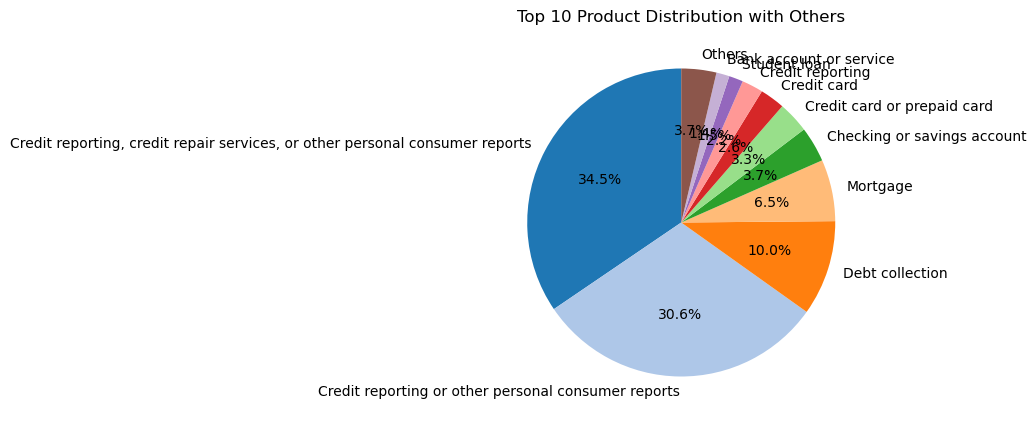

In [59]:
product_counts = df['Product'].value_counts()

# Separate top 10 and others
top_10 = product_counts.nlargest(10)
others = product_counts.iloc[10:].sum()

# Adding "Others" to the top 10 data
top_10['Others'] = others

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('tab20').colors)

# Adding a title
plt.title('Top 10 Product Distribution with Others')

# Displaying the pie chart
plt.show()

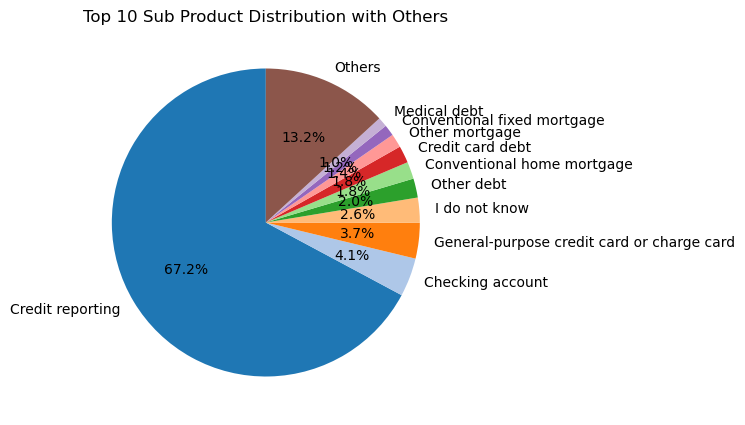

In [85]:
product_counts = df['Sub-product'].value_counts()

# Separate top 10 and others
top_10 = product_counts.nlargest(10)
others = product_counts.iloc[10:].sum()

# Adding "Others" to the top 10 data
top_10['Others'] = others

# Plotting the pie chart
plt.figure(figsize=(5,5))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('tab20').colors)

# Adding a title
plt.title('Top 10 Sub Product Distribution with Others')

# Displaying the pie chart
plt.show()

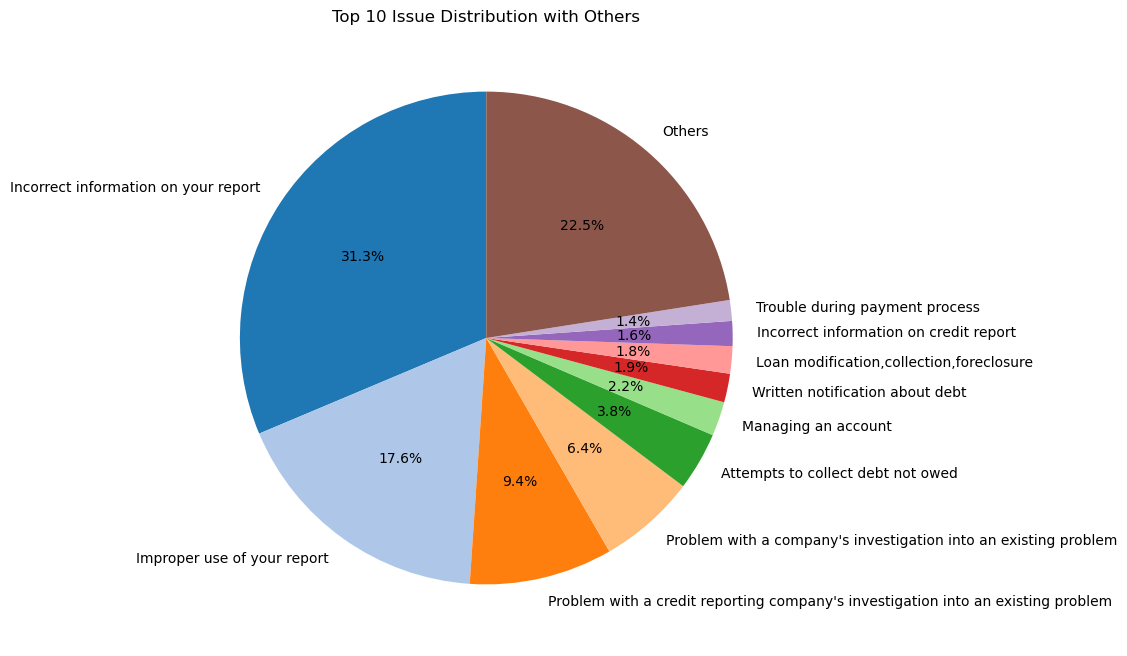

In [86]:
product_counts = df['Issue'].value_counts()

# Separate top 10 and others
top_10 = product_counts.nlargest(10)
others = product_counts.iloc[10:].sum()

# Adding "Others" to the top 10 data
top_10['Others'] = others

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('tab20').colors)

# Adding a title
plt.title('Top 10 Issue Distribution with Others')

# Displaying the pie chart
plt.show()

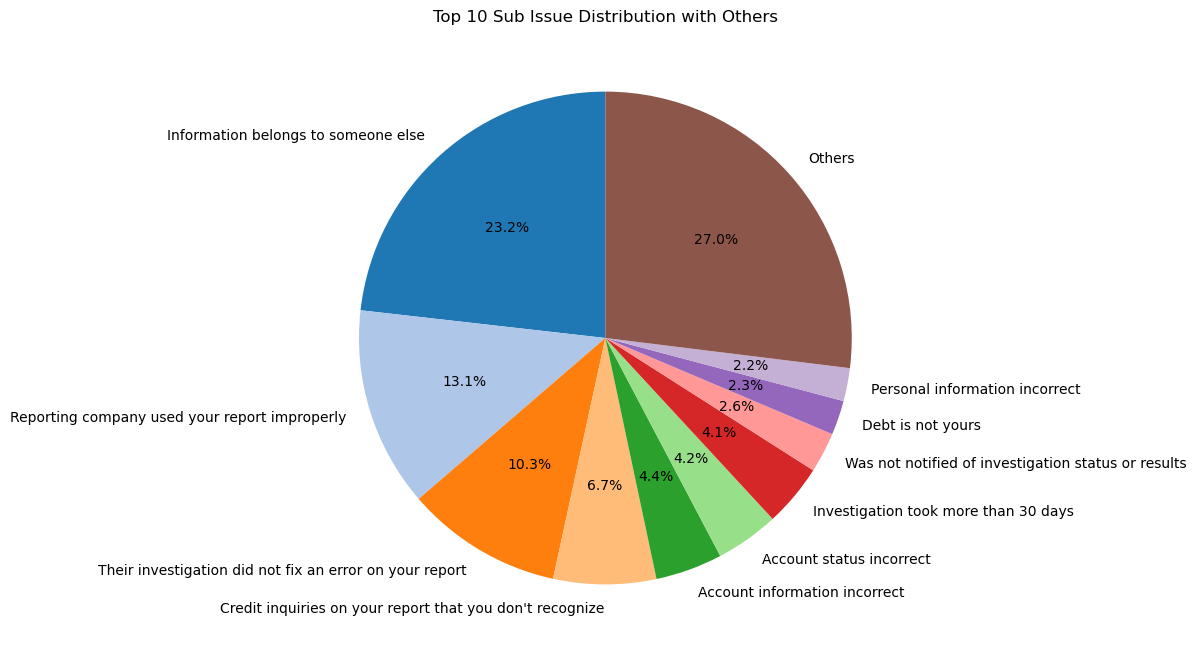

In [87]:
product_counts = df['Sub-issue'].value_counts()

# Separate top 10 and others
top_10 = product_counts.nlargest(10)
others = product_counts.iloc[10:].sum()

# Adding "Others" to the top 10 data
top_10['Others'] = others

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=90, colors=plt.get_cmap('tab20').colors)

# Adding a title
plt.title('Top 10 Sub Issue Distribution with Others')

# Displaying the pie chart
plt.show()

In [52]:
company_mapping = {
    'Equifax': 'Equifax',
    'TRANSUNION INTERMEDIATE HOLDINGS, INC.': 'TransUnion',
    'Experian Information Solutions Inc.': 'Experian',
    'BANK OF AMERICA, NATIONAL ASSOCIATION': 'BankOfAmerica',
    'WELLS FARGO & COMPANY': 'WellsFargo',
    'JPMORGAN CHASE & CO.': 'JPMorgan',
    'CAPITAL ONE FINANCIAL CORPORATION': 'CapitalOne',
    'Citibank': 'Citibank',
    'Synchrony': 'Synchrony',
    'Navient': 'Navient'
}

df['Company'] = df['Company'].replace(company_mapping)

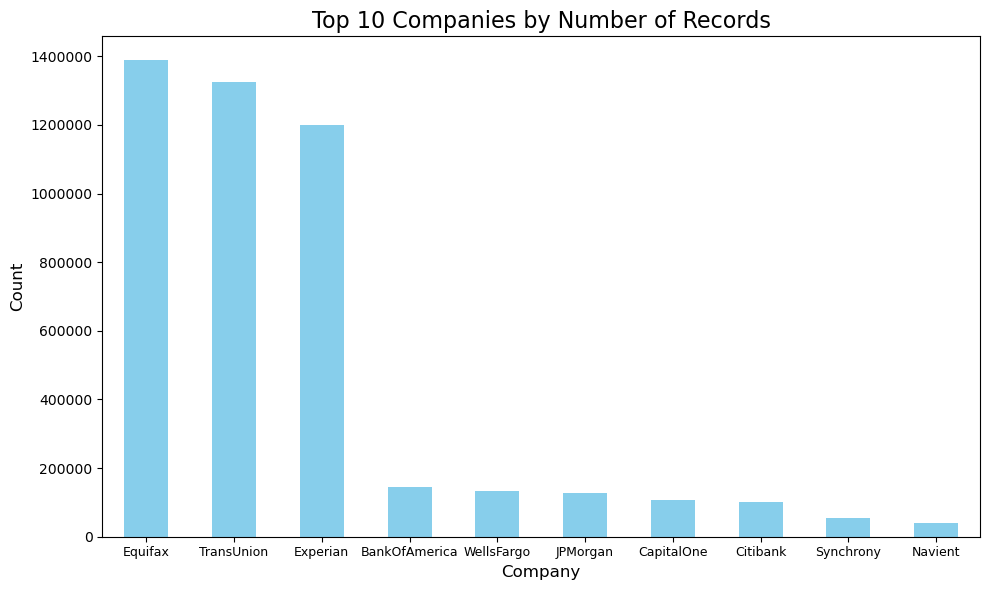

In [57]:
from matplotlib.ticker import FuncFormatter

company_counts = df['Company'].value_counts().nlargest(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar_plot = company_counts.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Top 10 Companies by Number of Records', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Count', fontsize=12)

formatter = FuncFormatter(lambda x, pos: f'{int(x)}')
bar_plot.yaxis.set_major_formatter(formatter)

# Rotating the x-labels for better readability
plt.xticks(rotation=0,fontsize = 9)

# Displaying the bar chart
plt.tight_layout()
plt.show()

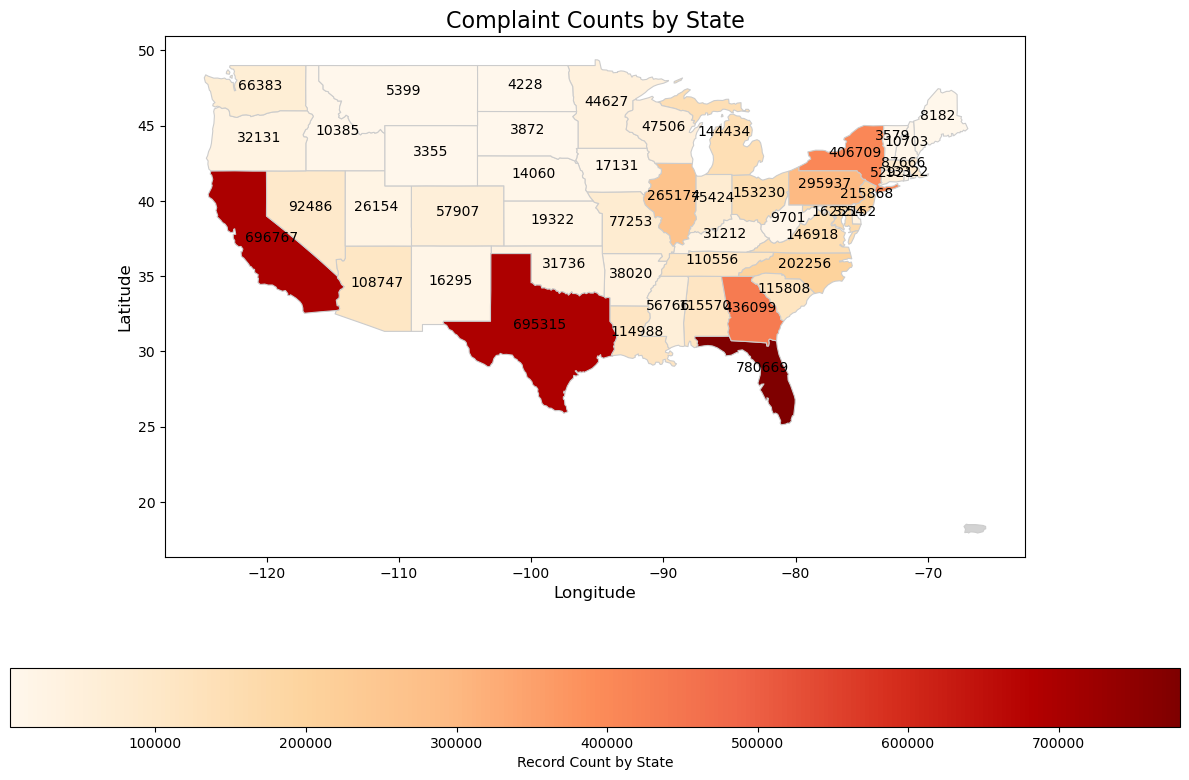

In [83]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


# Count occurrences of each state abbreviation
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

# Load the US states shapefile
states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Ensure that the GeoDataFrame has a mapping for state abbreviations
abbreviation_mapping = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Update the GeoDataFrame to use state abbreviations
states['abbreviation'] = states['name'].map(abbreviation_mapping)

# Exclude Alaska from the states GeoDataFrame
states = states[~states['abbreviation'].isin(['AK', 'PR', 'HI'])]

# Merge the counts with the states GeoDataFrame
merged = states.merge(state_counts, how='left', left_on='abbreviation', right_on='State')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Create a choropleth map
merged.plot(column='Count', ax=ax, legend=True,
            legend_kwds={'label': "Record Count by State",
                         'orientation': "horizontal"},
            missing_kwds={"color": "lightgrey", "label": "No data"},
            cmap='OrRd', linewidth=0.8, edgecolor='0.8')

# Add counts on the map
for x, y, label in zip(merged.geometry.centroid.x, 
                       merged.geometry.centroid.y, 
                       merged['Count']):
    ax.text(x, y, str(int(label)) if label > 0 else '', 
            fontsize=10, ha='center', color='black')

plt.title('Complaint Counts by State', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-09-13,Debt collection,Rental debt,False statements or representation,Told you not to respond to a lawsuit they file...,NaN,NaN,"National Credit Systems,Inc.",NC,28348,NaN,NaN,Web,2024-09-13,In progress,Yes,NaN,10126195
1,2024-07-20,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I want to report that someone opened a account...,NaN,TRANSWORLD SYSTEMS INC,NY,11590,NaN,Consent provided,Web,2024-07-20,Closed with explanation,Yes,NaN,9568668
2,2024-06-03,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,77057,NaN,Consent not provided,Web,2024-06-03,Closed with explanation,Yes,NaN,9162861
3,2024-06-03,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,I have identified unauthorized inquiries on my...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,92114,NaN,Consent provided,Web,2024-06-03,Closed with explanation,Yes,NaN,9162388
4,2024-07-19,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Problem with personal statement of dispute,After a discrepancy between my former finance ...,Company has responded to the consumer and the ...,HYUNDAI CAPITAL AMERICA,CA,90062,NaN,Consent provided,Web,2024-07-19,Closed with explanation,Yes,NaN,9560948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270692,2022-06-21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,93278,NaN,Consent not provided,Web,2022-06-21,Closed with explanation,Yes,NaN,5689457
6270693,2022-06-21,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"WHEELS FINANCIAL GROUP, LLC.",CA,94531,NaN,Consent not provided,Web,2022-07-05,Closed with explanation,Yes,NaN,5689488
6270694,2022-06-21,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,Remove and delete the following accounts,NaN,"TIDEWATER FINANCE COMPANY, INC.",TN,38106,NaN,Consent provided,Web,2022-06-21,Closed with explanation,Yes,NaN,5689582
6270695,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with non-monetary relief,Yes,NaN,5637857


<Figure size 1000x600 with 0 Axes>

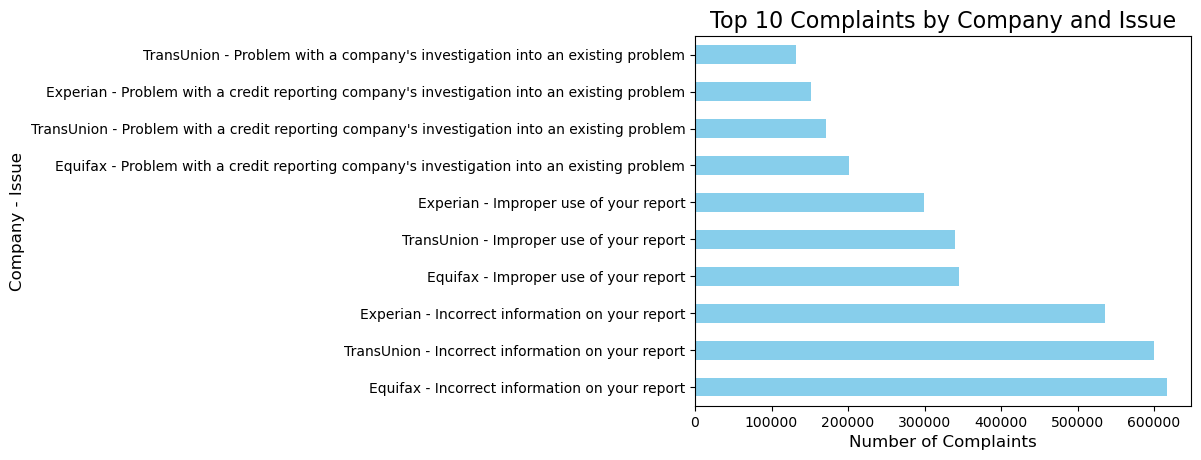

In [90]:
df['Company_Issue'] = df['Company'] + ' - ' + df['Issue']

# Step 2: Count occurrences of each Company_Issue combination
company_issue_counts = df['Company_Issue'].value_counts().reset_index()
company_issue_counts.columns = ['Company_Issue', 'Count']

# Step 3: Get top 10 combinations and sort in descending order
top_10_complaints = company_issue_counts.nlargest(10, 'Count').sort_values(by='Count', ascending=False)

# Step 4: Plotting the bar chart
plt.figure(figsize=(10, 6))
bar_plot = top_10_complaints.plot(kind='barh', x='Company_Issue', y='Count', 
                                    color='skyblue', legend=False)

# Adding title and labels
plt.title('Top 10 Complaints by Company and Issue', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=12)
plt.ylabel('Company - Issue', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()